In [29]:
# 勾配ブースティング（回帰）の実装
from sklearn.tree import DecisionTreeRegressor 
class MyGradientBoostingRegressor:
    def __init__(self, learning_rate=0.02, n_estimators=100, max_depth=1, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        self.F0 = y.mean()
        Fb = self.F0

        for _ in range(self.n_estimators):
            # 残差を計算
            r = y - Fb
            estimator = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            estimator.fit(X, r)
            weight = estimator.predict(X)
            # Fb = Fb + self.learning_rate * weight
            Fb += self.learning_rate * weight
            self.estimators.append(estimator) 

    def predict(self, X):
        
        Fb = self.F0
        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)

        return Fb

<Axes: xlabel='horsepower', ylabel='mpg'>

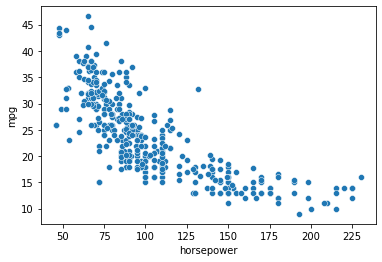

In [30]:
# データ準備
import seaborn as sns
df = sns.load_dataset("mpg")
df.dropna(inplace=True)
X = df["horsepower"].values.reshape(-1, 1)
y = df["mpg"].values
sns.scatterplot(x=df["horsepower"], y=df["mpg"])

In [31]:
mgbr = MyGradientBoostingRegressor()
mgbr.fit(X, y)
mgbr.predict(X)

array([18.34741142, 17.12764094, 17.12764094, 17.12764094, 17.45285907,
       17.12764094, 17.12764094, 17.12764094, 17.12764094, 17.12764094,
       17.12764094, 17.12764094, 17.12764094, 17.12764094, 22.99197236,
       22.99197236, 22.27960667, 24.4195757 , 24.4195757 , 30.49913443,
       24.4195757 , 24.4195757 , 22.99197236, 20.97032948, 24.4195757 ,
       17.12764094, 17.12764094, 17.12764094, 17.12764094, 24.4195757 ,
       24.4195757 , 22.99197236, 20.97032948, 20.97032948, 20.97032948,
       24.4195757 , 20.97032948, 17.12764094, 17.12764094, 17.12764094,
       17.12764094, 17.12764094, 17.12764094, 17.12764094, 20.97032948,
       27.33408439, 20.97032948, 24.4195757 , 24.4195757 , 24.4195757 ,
       30.49913443, 27.33408439, 30.49913443, 30.49913443, 30.49913443,
       30.49913443, 22.99197236, 27.33408439, 30.49913443, 24.4195757 ,
       24.4195757 , 17.12764094, 17.12764094, 17.12764094, 17.12764094,
       17.12764094, 17.12764094, 17.12764094, 17.12764094, 17.12

In [22]:
len(mgbr.estimators)

105

In [13]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
